# Reproducing GHR results
The results by Gruber, Holzer and Rauch are being examined and checked.
###### Nils Dyck, 29.04.2023

In [1]:
import pandas as pd

data = pd.read_csv('../data/cleaned/CIAA-CIAA_m2.csv', sep=';')
ciaa = pd.read_csv('../data/cleaned/CIAA-CIAA.csv',sep=';')
ghr = pd.read_csv('../data/cleaned/gruber-holzer-rauch_dataset.csv', sep=';')
ghr_authors = ghr['URL'].to_list()
ghr_co_authors = ghr['AuthorURLs'].to_list()
ghr_titles = ghr['Title'].to_list()
data.shape


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


(1607, 6)

In [2]:
import networkx as nx
G = nx.Graph()
for i in range(len(ghr_authors)-1):
    entries = ghr_co_authors[i]
    entries = entries.split(',')
    for entry in entries:
        if entry != ghr_authors[i]:
            G.add_edge(ghr_authors[i],entry)

In [3]:
nx.average_clustering(G)

0.6067502310539443

The total number of papers.

In [4]:
ciaa = data.loc[data['Year']<2022]
ciaa_m = ciaa.drop_duplicates(subset='Title')
ciaa_titles = ciaa_m['Title'].to_list()
len(set(ciaa_titles)) #7 papers with title 'None'...
len(ciaa_titles)

687

Total number of authors.

In [5]:
ciaa_authors = ciaa['Author'].to_list()
len(set(ciaa_authors))

839

In [6]:
len(set(ghr_authors))

839

In [7]:
len(set(ghr_titles))

687

Mean papers per author

In [8]:
authors = ciaa['Author'].to_list()
print(len(set(authors)))
paper_author_list = [0 for i in range(100)]
papers_per_author = []

for author in set(authors):
    res = authors.count(author)
    papers_per_author.append(res)
    paper_author_list[res] += 1

mean = sum(papers_per_author)/len(papers_per_author)
mean

839


1.8605482717520858

In [9]:
paper_author_list = [0 for i in range(100)]
papers_per_author = []

for author in set(ghr_authors):
    res = ghr_authors.count(author)
    papers_per_author.append(res)
    paper_author_list[res] += 1

mean = sum(papers_per_author)/len(papers_per_author)
mean

1.8212157330154946

In [10]:
difference = [author for author in set(ghr_authors) if author not in set(ciaa_authors)]
len(difference)

839

In [11]:
print(set(ghr_authors))
print(set(ciaa_authors))

{'https://dblp.org/pid/57/9125.html', 'https://dblp.org/pid/n/JNiehren.html', 'https://dblp.org/pid/t/StefanoTonetta.html', 'https://dblp.org/pid/249/5355.html', 'https://dblp.org/pid/99/1614.html', 'https://dblp.org/pid/39/6778.html', 'https://dblp.org/pid/58/4730-1.html', 'https://dblp.org/pid/86/919.html', 'https://dblp.org/pid/96/395.html', 'https://dblp.org/pid/37/1716.html', 'https://dblp.org/pid/m/RobertEMercer.html', 'https://dblp.org/pid/35/1544.html', 'https://dblp.org/pid/21/4601.html', 'https://dblp.org/pid/185/0479.html', 'https://dblp.org/pid/91/3140.html', 'https://dblp.org/pid/h/KeesHemerik.html', 'https://dblp.org/pid/76/6823.html', 'https://dblp.org/pid/79/7411.html', 'https://dblp.org/pid/02/4801.html', 'https://dblp.org/pid/80/7247.html', 'https://dblp.org/pid/75/5475.html', 'https://dblp.org/pid/05/2921.html', 'https://dblp.org/pid/73/962-1.html', 'https://dblp.org/pid/09/4704.html', 'https://dblp.org/pid/08/2272.html', 'https://dblp.org/pid/86/106.html', 'https://

In [12]:
author = 'https://dblp.org/pid/24/4309.html'
ciaa_authors.count(author)

0

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


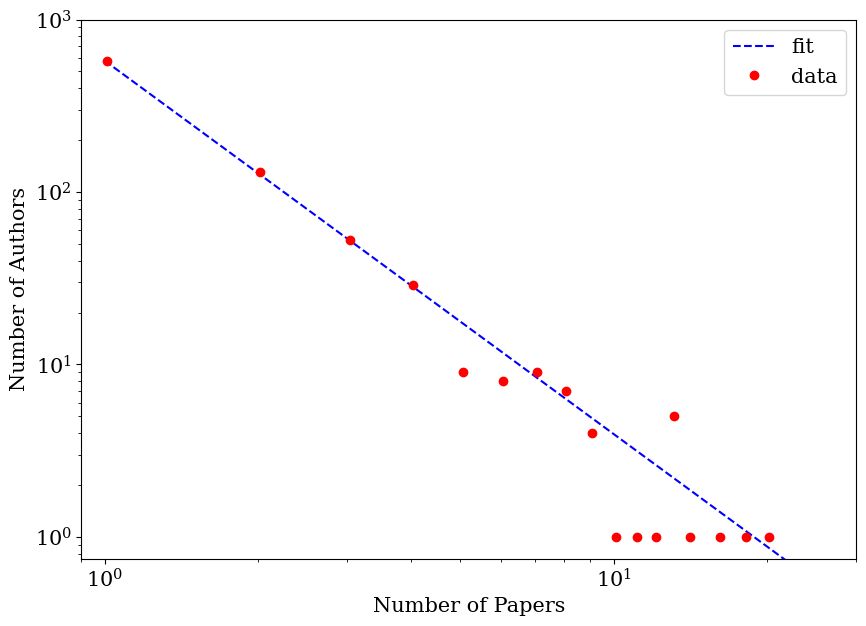

In [13]:
import matplotlib.pyplot as plt, numpy as np, math
from scipy.optimize import curve_fit

plt.rcParams['font.family'] = 'serif'
plt.rc('font', size=15)

plt.figure(figsize=(10,7))

# Define the power-law function
def power_law(x, a, b):
    return np.power(x, b) * a

# Initiate data
x = np.linspace(0,100,100)
y = paper_author_list
# x_fit = np.linspace(1,100,100)
# y_fit = paper_author_list
x_fit = np.linspace(1,92,91)
y_fit = paper_author_list[1:-8]

# Fit the power-law function to the data
popt, pcov = curve_fit(power_law, x_fit, y_fit)


# Plot the fitted power-law curve
y_fit = power_law(x_fit, *popt)
plt.loglog(x_fit, y_fit, '--b', label='fit')

# Plot the data on a log-log scale
plt.loglog(x, y, 'or', label='data')

# Add labels and legend
plt.xlabel('Number of Papers')
plt.ylabel('Number of Authors')
plt.legend()
plt.axis((0.9e0,0.3e2,0.75e0,1e3))

plt.savefig('../../Figures/papers_per_author.png', bbox_inches = 'tight')

In [14]:
a = popt[0]
b = popt[1]
print(a)
print(b)

577.5106342800362
-2.1642391816763933


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(-0.08403939408931427, 0.7498548318826134)

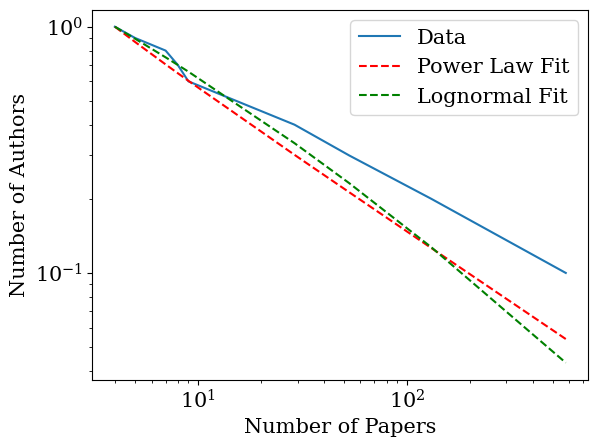

In [15]:
import powerlaw

fit = powerlaw.Fit(y, discrete=True)
fig1 = fit.plot_ccdf(linestyle='-', label='Data')
fit.power_law.plot_ccdf(ax=fig1, color='r', linestyle='--', label='Power Law Fit')
fit.lognormal.plot_ccdf(ax=fig1, color='g', linestyle='--', label='Lognormal Fit')
plt.legend()
plt.xlabel('Number of Papers')
plt.ylabel('Number of Authors')
plt.legend()
#plt.axis((0.9e0,0.3e2,0.75e0,1e3))
fit.power_law.alpha
fit.distribution_compare('power_law', 'lognormal')

Drop duplicated titles.

In [16]:
ciaa = ciaa.drop_duplicates(subset='Title')
ciaa.shape

(687, 6)

Mean authors per paper.

In [17]:
data_m = data.loc[data['Year']<2022].drop_duplicates(subset='Title')
print(data_m.shape)
no_authors = data_m['No Authors'].to_list()
mean = sum(no_authors)/len(no_authors)
mean
# summe = 0
# for entry in ciaa_co_authors:
#     entry = entry.replace('[','').replace(']','').replace(' ','').replace("'","")
#     entry = entry.split(',')
#     #print(entry)
#     #entry = [e for e in entry if entry != '']
#     l = len(entry)+1
#     no_authors.append(l+1)
#     summe += l
# mean = summe/688
# mean

(687, 6)


2.2197962154294033

In [18]:
authors_per_paper = [no_authors.count(i) for i in range(1,max(no_authors)+1)]
authors_per_paper

[205, 237, 161, 62, 18, 3, 1]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


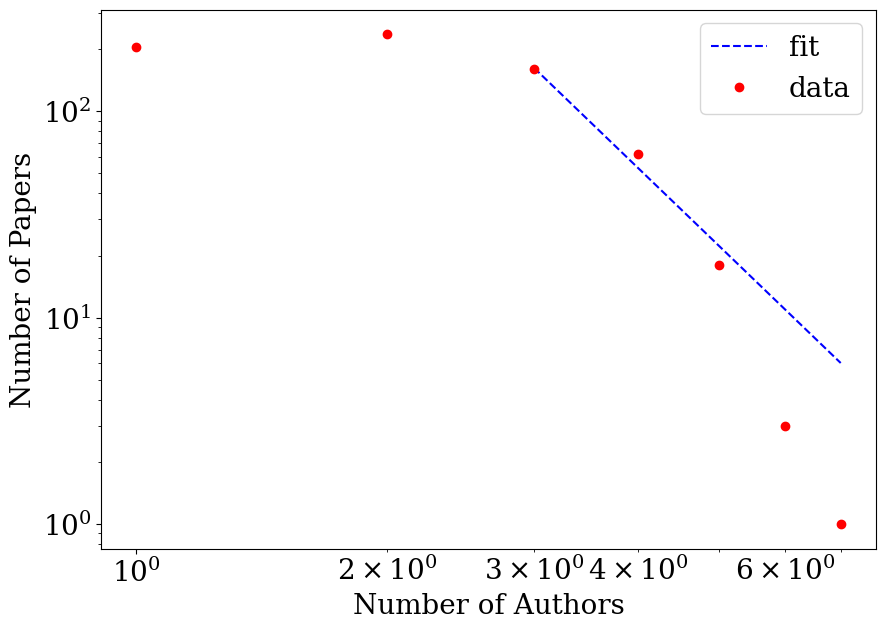

In [19]:
plt.figure(figsize=(10,7))
plt.rc('font',size=20)

# Define the power-law function
# def power_law(x, a, b):
#     return a * np.power(x, b)

# Initiate data
x = np.linspace(1,7,7)
y = authors_per_paper
x_fit = np.linspace(3,7,5)
y_fit = authors_per_paper[2:]

# Fit the power-law function to the data
popt, pcov = curve_fit(power_law, x_fit, y_fit)

# Plot the fitted power-law curve
y_fit = power_law(x_fit, *popt)
plt.loglog(x_fit, y_fit, '--b', label='fit')

# Plot the data on a log-log scale
plt.loglog(x, y, 'or', label='data')

# Add labels and legend
plt.xlabel('Number of Authors')
plt.ylabel('Number of Papers')
plt.legend()
#plt.axis((0.9e0,0.3e2,0.75e0,1e3))

plt.savefig('../../Figures/ciaa_authors_power-law.png', bbox_inches='tight')

Mean collaborators per author.